In [3]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet


In [4]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import plotly.io as pio
pio.renderers.default='colab'

In [6]:
df=pd.read_csv("AMZN.csv")

In [7]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-07,164.576996,166.287506,164.153000,165.121506,165.121506,48182000
1,2021-10-08,165.850006,166.071503,164.410004,164.431000,164.431000,39964000
2,2021-10-11,163.750000,164.629501,161.904999,162.315002,162.315002,40684000
3,2021-10-12,162.850006,163.376495,161.813995,162.366501,162.366501,36392000
4,2021-10-13,163.485504,164.419006,163.054504,164.214005,164.214005,48402000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,143.810575,146.039836,141.483576,143.695840,143.695840,7.170801e+07
std,23.345573,23.171755,23.381791,23.216123,23.216123,3.158865e+07
min,102.750000,104.580002,101.260002,102.309998,102.309998,3.575400e+07
25%,122.364750,123.842503,119.970000,122.257500,122.257500,5.266600e+07
50%,145.121750,147.917504,142.035248,144.803497,144.803497,6.314730e+07
75%,165.154500,166.510246,163.787750,165.025124,165.025124,8.058900e+07
max,185.634506,188.107498,183.785995,184.802994,184.802994,2.726620e+08


In [10]:
px.area(df,x="Date",y="Close")

In [11]:
px.line(df,x="Date",y="Close")

In [12]:
px.area(df,x="Date",y="Volume")

In [13]:
px.bar(df, y='Volume')

In [14]:
px.box(df,y="Close")

In [15]:
columns =['Date',"Close"]
ndf = pd.DataFrame(df,columns=columns)

In [16]:
ndf

,Date,Close
0,2021-10-07,165.121506
1,2021-10-08,164.431000
2,2021-10-11,162.315002
3,2021-10-12,162.366501
4,2021-10-13,164.214005
...,...,...
247,2022-09-30,113.000000
248,2022-10-03,115.879997
249,2022-10-04,121.089996
250,2022-10-05,120.949997


In [17]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [18]:
prophet_df

,ds,y
0,2021-10-07,165.121506
1,2021-10-08,164.431000
2,2021-10-11,162.315002
3,2021-10-12,162.366501
4,2021-10-13,164.214005
...,...,...
247,2022-09-30,113.000000
248,2022-10-03,115.879997
249,2022-10-04,121.089996
250,2022-10-05,120.949997


In [19]:
m =Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-07,174.721787,162.289359,189.863260,174.721787,174.721787,1.723478,1.723478,1.723478,1.723478,1.723478,1.723478,0.0,0.0,0.0,176.445264
1,2021-10-08,174.579840,162.987125,188.864594,174.579840,174.579840,1.451423,1.451423,1.451423,1.451423,1.451423,1.451423,0.0,0.0,0.0,176.031262
2,2021-10-11,174.153998,162.150294,190.413230,174.153998,174.153998,2.432892,2.432892,2.432892,2.432892,2.432892,2.432892,0.0,0.0,0.0,176.586890
3,2021-10-12,174.012051,162.259314,190.068770,174.012051,174.012051,1.918462,1.918462,1.918462,1.918462,1.918462,1.918462,0.0,0.0,0.0,175.930513
4,2021-10-13,173.870103,162.055686,190.509794,173.870103,173.870103,2.268440,2.268440,2.268440,2.268440,2.268440,2.268440,0.0,0.0,0.0,176.138544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2022-12-01,130.941314,117.647774,146.209877,127.640627,133.978187,1.723478,1.723478,1.723478,1.723478,1.723478,1.723478,0.0,0.0,0.0,132.664791
308,2022-12-02,131.029062,117.464140,145.434104,127.666934,134.138676,1.451423,1.451423,1.451423,1.451423,1.451423,1.451423,0.0,0.0,0.0,132.480485
309,2022-12-03,131.116811,111.745136,140.469213,127.680837,134.317474,-4.897348,-4.897348,-4.897348,-4.897348,-4.897348,-4.897348,0.0,0.0,0.0,126.219463
310,2022-12-04,131.204560,110.619561,141.013664,127.693723,134.520779,-4.897348,-4.897348,-4.897348,-4.897348,-4.897348,-4.897348,0.0,0.0,0.0,126.307212


In [22]:
px.line(forecast,x='ds',y='yhat')

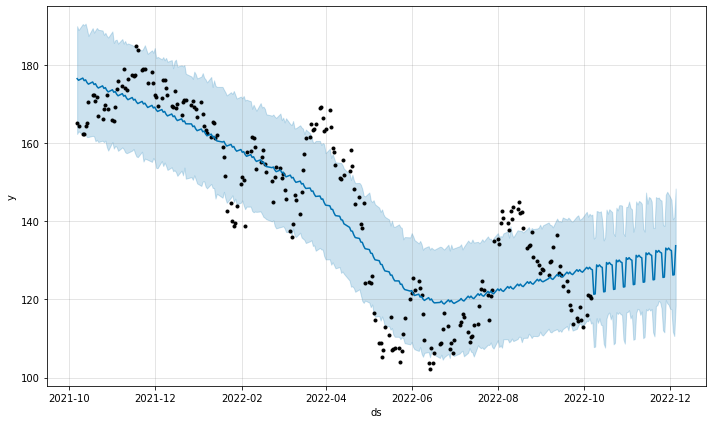

In [23]:
figure = m.plot(forecast,xlabel='ds',ylabel="y")

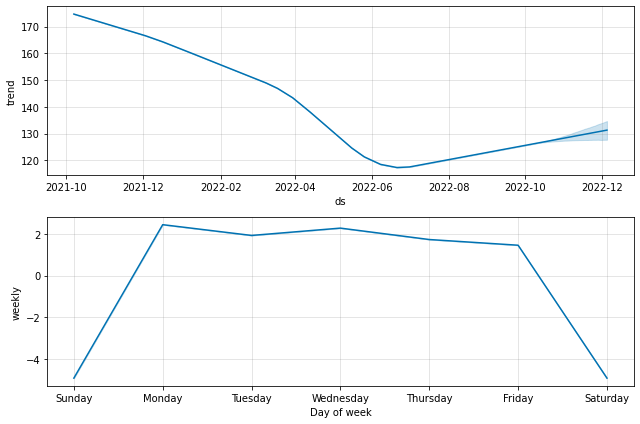

In [24]:
figure = m.plot_components(forecast)

In [25]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>